In [1]:
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
f = misc.face(gray=True)  # retrieve a grayscale image
misc.imsave('face-gray.png', f)

In [3]:
face = misc.imread('face-gray.png')
print type(face)
print face.shape, face.dtype

<type 'numpy.ndarray'>
(768, 1024) uint8


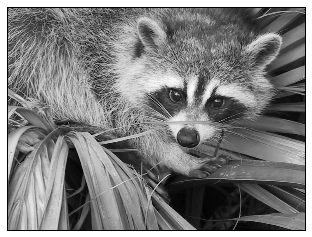

In [4]:
plt.imshow(face, cmap=plt.cm.gray)
plt.xticks([]), plt.yticks([])
plt.show()

In [5]:
from wavelet import wt

In [6]:
wt = wt()

In [7]:
result = wt.atrous(face, 6)

##WT--A Trous--Plane: 6
##WT--A Trous--Plane: 5
##WT--A Trous--Plane: 4
##WT--A Trous--Plane: 3
##WT--A Trous--Plane: 2
##WT--A Trous--Plane: 1
##WT--A Trous--Plane: 0


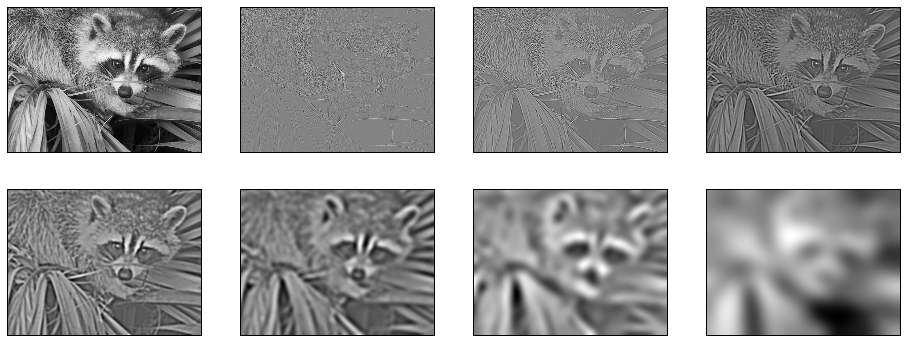

In [8]:
plt.figure(figsize=(16,6))

plt.subplot(241)
plt.imshow(face, cmap=plt.cm.gray)
plt.xticks([]), plt.yticks([])
for i,lvl in enumerate(result):
    plt.subplot(24*10+i+2)
    plt.imshow(lvl, cmap=plt.cm.gray)
    plt.xticks([]), plt.yticks([])

plt.show()

In [9]:
filteredplane = wt.filtering(result, threshold=2.5, mask=(0, 768, 0, 1024))

#WT-- Image Filtering
#WT-- Filtering to be checked
##WT--Plane 6 Sigma = 7.841485e+00
##WT--Pixel filtered : 758289
##WT--Plane 5 Sigma = 9.657542e+00
##WT--Pixel filtered : 750914
##WT--Plane 4 Sigma = 9.188602e+00
##WT--Pixel filtered : 731849
##WT--Plane 3 Sigma = 9.547577e+00
##WT--Pixel filtered : 733443
##WT--Plane 2 Sigma = 1.022422e+01
##WT--Pixel filtered : 743730
##WT--Plane 1 Sigma = 1.009715e+01
##WT--Pixel filtered : 741038


In [10]:
np.shape(filteredplane)

(7, 768, 1024)

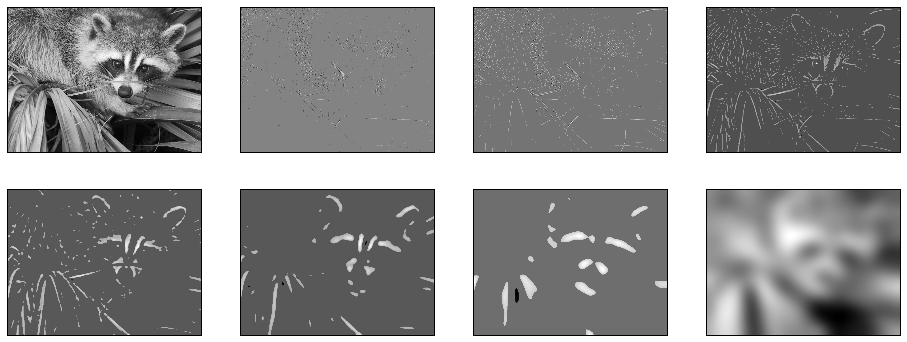

In [11]:
plt.figure(figsize=(16,6))

plt.subplot(241)
plt.imshow(face, cmap=plt.cm.gray)
plt.xticks([]), plt.yticks([])
for i,lvl in enumerate(filteredplane):
    plt.subplot(24*10+i+2)
    plt.imshow(lvl, cmap=plt.cm.gray)
    plt.xticks([]), plt.yticks([])

plt.show()

In [12]:
filtered = wt.restore(filteredplane, 0, 6)

##WT--Restore-plane: 0 to 6
##WT--Restore-plane: 0
##WT--Restore-plane: 1
##WT--Restore-plane: 2
##WT--Restore-plane: 3
##WT--Restore-plane: 4
##WT--Restore-plane: 5
##WT--Restore-plane: 6


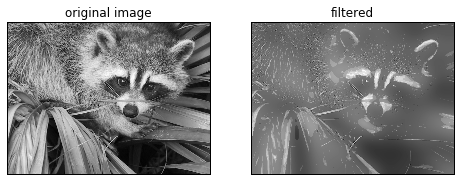

In [13]:
plt.figure(figsize=(8,5))

plt.subplot(121)
plt.imshow(face, cmap=plt.cm.gray)
plt.title("original image")
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.title("filtered")
plt.imshow(filtered, cmap=plt.cm.gray)
plt.xticks([]), plt.yticks([])

plt.show()